# 1
En esta primera parte vamos hablar de la expoloracion de la base de datos, con el fin de planificar la extraccion de los datos que necesitamos de esta.  

In [2]:
import requests # se debe explicar las caracteristicas principales de estas librerias. 
import json
import csv
import os

Necesitamos conocer como esta depositada la informacion que deseamos extraer dentro de la pagina, para hacer una expoliracion  de esto podemos usar la herramienta inspeccionar de los buscadores web como chrome y eage. 
...
..
.

Para seguir un ejemplo que puedes ser de ayuda, supongamos que queremos extraer datos del OEC. Queremos hacer un estudio de como se comporto el comercio de cierto producto durante el 2010 y 2012. Primero hacemos una exploracions... 

...
..
.

Ya que encontramos donde podemos encontrar en la pagina la informacion que necesitamos entonces comenzamos a explorar como hacernos de esta infomacion, primero, haciendo uso de la libreria requests extraemos la informacion de la URL. 
...
..
.

In [1]:
import requests

#Cargamos los datos de la URL con el siguiente comando
url = 'https://oec.world/olap-proxy/data?cube=trade_i_baci_a_92&drilldowns=Year,Importer%20Country&measures=Trade%20Value&parents=true&Year=2010&Exporter%20Country=sacol&HS4=52709&properties=Importer%20Country%20ISO%203'
myfile = requests.get(url) #Con requests.get obtenemos la informacion contenida en la URL 

In [3]:
import json
#Hay que emplicar las posibles operaciones que tenemos en 
Tab=myfile.content.decode("utf-8")#Devolvemos el contenido la URL y con decode('utf-8') cambios de formato bits a formato texto
Dic = json.loads(Tab) # Con json.loads cambiamos el formato texto a diccionario o JSON


In [4]:
#Buscamos los datos que necesitamos dentro del dicionario. 
dic=Dic['data'] #En este caso son los datos con el key: Data
dic

[{'Year': 2010,
  'Continent ID': 'af',
  'Continent': 'Africa',
  'Country ID': 'afciv',
  'Country': "Cote d'Ivoire",
  'ISO 3': 'civ',
  'Trade Value': 203427548.88},
 {'Year': 2010,
  'Continent ID': 'af',
  'Continent': 'Africa',
  'Country ID': 'afzaf',
  'Country': 'South Africa',
  'ISO 3': 'zaf',
  'Trade Value': 37120768},
 {'Year': 2010,
  'Continent ID': 'as',
  'Continent': 'Asia',
  'Country ID': 'aschn',
  'Country': 'China',
  'ISO 3': 'chn',
  'Trade Value': 899466993.4399999},
 {'Year': 2010,
  'Continent ID': 'as',
  'Continent': 'Asia',
  'Country ID': 'asind',
  'Country': 'India',
  'ISO 3': 'ind',
  'Trade Value': 264244113.39999998},
 {'Year': 2010,
  'Continent ID': 'as',
  'Continent': 'Asia',
  'Country ID': 'askor',
  'Country': 'South Korea',
  'ISO 3': 'kor',
  'Trade Value': 39819057.506},
 {'Year': 2010,
  'Continent ID': 'as',
  'Continent': 'Asia',
  'Country ID': 'asmys',
  'Country': 'Malaysia',
  'ISO 3': 'mys',
  'Trade Value': 46198202.637},
 {'Ye

In [18]:
dic[1]['ISO 3']

'zaf'

In [11]:
#Podemos imprimir algunos de los valores que estan dentro del dicionario como: 
for key in dic: 
    print(key['ISO 3']) #El pais de destino de las exportaciones de petroleo 

civ
zaf
chn
ind
kor
mys
sgp
esp
gbr
ita
nld
pol
ant
can
cri
dom
pan
tto
usa
bra
chl
ecu
per


In [ ]:
#Comando para descargar los datos en formato csv de un diccionario. 

import csv

with open("data.csv", "w", newline="") as csv_file: # Creamos y abrimos un documento donde vamos a guardar la informacion que queremos exportar
  cols = ['Year'
          ,'Continent ID'
          ,'Continent'
          ,'Country ID'
          ,'Country'
          ,'ISO 3'
          ,'Trade Value'] # es necesario agregar el nombre de las columnas

  writer = csv.DictWriter(csv_file, fieldnames=cols) # Con este comando escribimos el nombre de las columnas en el archivo 
  writer.writeheader()
  writer.writerows(Dic['data']) # Con esta linea de comando se deposita en el .csv la informacion del dicionario que queremos exportar. 


# -----------------------------------------------------------------------------------------------------------
# 2


 Ahora necesitamos añadir nuevas entradas a este diccionario para poder tener una tabla completa necesaria para hacer el analisis que queremos tener. Pero primero vamos a importar los datos que queremos añadir a nuestros diccionario. Para esto utilizamos la siguiente linea de comandos.

In [20]:
import csv

with open("country_names.tsv") as tsvfile: # se abre el documento a importar
    tsvreader = csv.reader(tsvfile, delimiter='\t')  # Se lee y se copia en la nueva variable tsvreader  
    next(tsvreader) # se quita la primera fila, que es la cabezera
    # Ahora para transformar esta informacion a un diccionario primero creamos un vector vacio donde vamos a guardar los diccionarios 
    dat_paises=[]    
    for line in tsvreader: #entramos fila por fila a extraer los datos que necesitamos incluir en el diccionario 
        countries={}  # Creamos el diccionario basio al cual le vamos a añadir los valores extraidos
        countries['id']= line[0]
        countries['id_3char']= line[1]
        countries['name']= line[2]
        dat_paises.append(countries) # Añadimos este diccionario al vector con la funcion append
dat_paises        

[{'id': 'afago', 'id_3char': 'ago', 'name': 'Angola'},
 {'id': 'afbdi', 'id_3char': 'bdi', 'name': 'Burundi'},
 {'id': 'afben', 'id_3char': 'ben', 'name': 'Benin'},
 {'id': 'afbfa', 'id_3char': 'bfa', 'name': 'Burkina Faso'},
 {'id': 'afbwa', 'id_3char': 'bwa', 'name': 'Botswana'},
 {'id': 'afcaf', 'id_3char': 'caf', 'name': 'Central African Republic'},
 {'id': 'afciv', 'id_3char': 'civ', 'name': "Cote d'Ivoire"},
 {'id': 'afcmr', 'id_3char': 'cmr', 'name': 'Cameroon'},
 {'id': 'afcod',
  'id_3char': 'cod',
  'name': 'Democratic Republic of the Congo'},
 {'id': 'afcog', 'id_3char': 'cog', 'name': 'Republic of the Congo'},
 {'id': 'afcom', 'id_3char': 'com', 'name': 'Comoros'},
 {'id': 'afcpv', 'id_3char': 'cpv', 'name': 'Cape Verde'},
 {'id': 'afdji', 'id_3char': 'dji', 'name': 'Djibouti'},
 {'id': 'afdza', 'id_3char': 'dza', 'name': 'Algeria'},
 {'id': 'afegy', 'id_3char': 'egy', 'name': 'Egypt'},
 {'id': 'aferi', 'id_3char': 'eri', 'name': 'Eritrea'},
 {'id': 'afesh', 'id_3char': 'es

In [21]:
dat_paises [1]['id'] , dat_paises [1]['name']

('afbdi', 'Burundi')

In [22]:
# Podemos ahora imprimit el id de los paises con las siguientes lineas 
for key in dat_paises :
    print(key['id'])

afago
afbdi
afben
afbfa
afbwa
afcaf
afciv
afcmr
afcod
afcog
afcom
afcpv
afdji
afdza
afegy
aferi
afesh
afeth
afgab
afgha
afgin
afgmb
afgnb
afgnq
afken
aflbr
aflby
aflso
afmar
afmdg
afmli
afmoz
afmrt
afmus
afmwi
afmyt
afnam
afner
afnga
afreu
afrwa
afsdn
afsen
afshn
afsle
afsom
afssd
afstp
afswz
afsyc
aftcd
aftgo
aftun
aftza
afuga
afzaf
afzmb
afzwe
anata
anatf
anbvt
anhmd
ansgs
asafg
asare
asarm
asaze
asbgd
asbhr
asbrn
asbtn
ascck
aschn
ascxr
ascyp
asgeo
ashkg
asidn
asind
asiot
asirn
asirq
asisr
asjor
asjpn
askaz
askgz
askhm
askor
askwt
aslao
aslbn
aslka
asmac
asmdv
asmid
asmmr
asmng
asmys
asnpl
asomn
aspak
asphl
asprk
aspse
asqat
assau
assgp
assyr
astha
astjk
astkm
astls
astur
astwn
asuzb
asvnm
asyar
asyem
asymd
eualb
euand
euaut
eubel
eubgr
eubih
eublr
eublx
euche
euchi
eucsk
eucze
euddr
eudeu
eudnk
euesp
euest
eufdr
eufin
eufra
eufro
eugbr
eugib
eugrc
euhrv
euhun
euimn
euirl
euisl
euita
euksv
eulie
eultu
eulux
eulva
eumco
eumda
eumkd
eumlt
eumne
eunld
eunor
eupol
euprt
eurou
eurus
eusc

In [26]:
# este es un ejemplo que ayuda a la comprension de lo desarrollado arriba. Imoortante para poner en el blog-- poca informacion sobre este prosedimiento 
aa=[]
a={}
a['a']=1
a['b']=2
a['c']=3
aa.append(a)

a={}
a['a']=2
a['b']=3
a['c']=4
#a=[{'a':1,'b':2,'c':3}]
aa.append(a)
aa ,  aa[1]['a']

([{'a': 1, 'b': 2, 'c': 3}, {'a': 2, 'b': 3, 'c': 4}], 2)

# -------------------------------------------------------------------------------------------------------------
# 3
## 3.1

Ahora que ya tenemos la lista de paises y sabemos como podemos extraer los datos de exportacion de ellos en un año determinado, vamos ahora a intentar hacer una descarga masiva de lo informacion de todos los paises en un año determinado.  

In [50]:
# Antes de comenzar pordemos contar cuantos paises 
Npaises=len(dat_paises)

In [61]:
#Podemos comenzar declarando un año de interes, en este caso 2012:
año=2012
#Para comenzar vamos a extraer los datos del primer pais del dicionario dat_paises
pais=dat_paises[100]
#Selecionamos unicamente el id del pais, este dato es necesario para hacer modificar el URL. 
ID = pais['id']
print(ID)
#Ya que tenemos estos datos vamos a modificar la direcion URL 
url= 'https://oec.world/olap-proxy/data?cube=trade_i_baci_a_92&drilldowns=Year,Importer%20Country&measures=Trade%20Value&parents=true&Year='+str(año)+'&Exporter%20Country='+str(ID)+'&HS4=52709&properties=Importer%20Country%20ISO%203'
print(url)

asomn
https://oec.world/olap-proxy/data?cube=trade_i_baci_a_92&drilldowns=Year,Importer%20Country&measures=Trade%20Value&parents=true&Year=2012&Exporter%20Country=asomn&HS4=52709&properties=Importer%20Country%20ISO%203


In [62]:
pag = requests.get(url)
Tab=pag.content.decode("utf-8")#Devolvemos el contenido la URL y con decode('utf-8') cambios de formato bits a formato texto
Dic = json.loads(Tab) # Con json.loads cambiamos el formato texto a diccionario
dic=Dic['data'] #En este caso son los datos con el key: Data
dic # Esta primera consulta no arroja valores, por que  no se encuentra informacion de la comercializacion de petroleo en las bases de datos del OEC

[{'Year': 2012,
  'Continent ID': 'af',
  'Continent': 'Africa',
  'Country ID': 'afegy',
  'Country': 'Egypt',
  'ISO 3': 'egy',
  'Trade Value': 54316079.127},
 {'Year': 2012,
  'Continent ID': 'as',
  'Continent': 'Asia',
  'Country ID': 'asare',
  'Country': 'United Arab Emirates',
  'ISO 3': 'are',
  'Trade Value': 6809},
 {'Year': 2012,
  'Continent ID': 'as',
  'Continent': 'Asia',
  'Country ID': 'aschn',
  'Country': 'China',
  'ISO 3': 'chn',
  'Trade Value': 14023599265},
 {'Year': 2012,
  'Continent ID': 'as',
  'Continent': 'Asia',
  'Country ID': 'asind',
  'Country': 'India',
  'ISO 3': 'ind',
  'Trade Value': 214340624.25},
 {'Year': 2012,
  'Continent ID': 'as',
  'Continent': 'Asia',
  'Country ID': 'asjpn',
  'Country': 'Japan',
  'ISO 3': 'jpn',
  'Trade Value': 3830780329},
 {'Year': 2012,
  'Continent ID': 'as',
  'Continent': 'Asia',
  'Country ID': 'askor',
  'Country': 'South Korea',
  'ISO 3': 'kor',
  'Trade Value': 938444186.5200001},
 {'Year': 2012,
  'Cont

Ahora para algunos fines puedes queres concatenar mas informacion importante al diccionario antes de descargar definitivamente el directorio. Por ejemplo la informacion disponible sobre el pais al cual estamos lanzando la consulta.

In [67]:
pais

{'id': 'asomn', 'id_3char': 'omn', 'name': 'Oman'}

In [64]:
for md in dic:
    md.update(pais)   

{'Year': 2012, 'Continent ID': 'af', 'Continent': 'Africa', 'Country ID': 'afegy', 'Country': 'Egypt', 'ISO 3': 'egy', 'Trade Value': 54316079.127, 'id': 'asomn', 'id_3char': 'omn', 'name': 'Oman'}
{'Year': 2012, 'Continent ID': 'as', 'Continent': 'Asia', 'Country ID': 'asare', 'Country': 'United Arab Emirates', 'ISO 3': 'are', 'Trade Value': 6809, 'id': 'asomn', 'id_3char': 'omn', 'name': 'Oman'}
{'Year': 2012, 'Continent ID': 'as', 'Continent': 'Asia', 'Country ID': 'aschn', 'Country': 'China', 'ISO 3': 'chn', 'Trade Value': 14023599265, 'id': 'asomn', 'id_3char': 'omn', 'name': 'Oman'}
{'Year': 2012, 'Continent ID': 'as', 'Continent': 'Asia', 'Country ID': 'asind', 'Country': 'India', 'ISO 3': 'ind', 'Trade Value': 214340624.25, 'id': 'asomn', 'id_3char': 'omn', 'name': 'Oman'}
{'Year': 2012, 'Continent ID': 'as', 'Continent': 'Asia', 'Country ID': 'asjpn', 'Country': 'Japan', 'ISO 3': 'jpn', 'Trade Value': 3830780329, 'id': 'asomn', 'id_3char': 'omn', 'name': 'Oman'}
{'Year': 2012,

In [66]:
# Verificamos si los datos adicionales se agregan a cada unos de los diccionarios. 
dic

[{'Year': 2012,
  'Continent ID': 'af',
  'Continent': 'Africa',
  'Country ID': 'afegy',
  'Country': 'Egypt',
  'ISO 3': 'egy',
  'Trade Value': 54316079.127,
  'id': 'asomn',
  'id_3char': 'omn',
  'name': 'Oman'},
 {'Year': 2012,
  'Continent ID': 'as',
  'Continent': 'Asia',
  'Country ID': 'asare',
  'Country': 'United Arab Emirates',
  'ISO 3': 'are',
  'Trade Value': 6809,
  'id': 'asomn',
  'id_3char': 'omn',
  'name': 'Oman'},
 {'Year': 2012,
  'Continent ID': 'as',
  'Continent': 'Asia',
  'Country ID': 'aschn',
  'Country': 'China',
  'ISO 3': 'chn',
  'Trade Value': 14023599265,
  'id': 'asomn',
  'id_3char': 'omn',
  'name': 'Oman'},
 {'Year': 2012,
  'Continent ID': 'as',
  'Continent': 'Asia',
  'Country ID': 'asind',
  'Country': 'India',
  'ISO 3': 'ind',
  'Trade Value': 214340624.25,
  'id': 'asomn',
  'id_3char': 'omn',
  'name': 'Oman'},
 {'Year': 2012,
  'Continent ID': 'as',
  'Continent': 'Asia',
  'Country ID': 'asjpn',
  'Country': 'Japan',
  'ISO 3': 'jpn',


## -----------------------------------------------------------------------------------------------------------
## 3.2

Ahora con lo hecho antes y con ayuda de un  ciclo for podemos extrarer los datos de todos los paises en este año en un unico diccionario, esto lo hacemos con el fin de poder descargar un unico documento.

In [ ]:
#construimos el ciclo for con los comandos desarollados en el modulo anterior.
#---------------
#Podemos comenzar declarando un año de interes, en este caso 2012:
año=2012

In [78]:
# Para 
datos=[]
for pais in dat_paises:
    ID=pais['id']
    print(ID)
    url= 'https://oec.world/olap-proxy/data?cube=trade_i_baci_a_92&drilldowns=Year,Importer%20Country&measures=Trade%20Value&parents=true&Year='+str(año)+'&Exporter%20Country='+str(ID)+'&HS4=52709&properties=Importer%20Country%20ISO%203'
    pag = requests.get(url)
    cont=pag.content.decode("utf-8")#Devolvemos el contenido la URL y con decode('utf-8') cambios de formato bits a formato texto
    dirc = json.loads(cont) # Con json.loads cambiamos el formato texto a diccionario
    dic=dirc['data'] #En este caso son los datos con el key: Data
    for md in dic:
        md.update(pais)
    datos=datos+dic    

afago
afbdi
afben
afbfa
afbwa
afcaf
afciv
afcmr
afcod
afcog
afcom
afcpv
afdji
afdza
afegy
aferi
afesh
afeth
afgab
afgha
afgin
afgmb
afgnb
afgnq
afken
aflbr
aflby
aflso
afmar
afmdg
afmli
afmoz
afmrt
afmus
afmwi
afmyt
afnam
afner
afnga
afreu
afrwa
afsdn
afsen
afshn
afsle
afsom
afssd
afstp
afswz
afsyc
aftcd
aftgo
aftun
aftza
afuga
afzaf
afzmb
afzwe
anata
anatf
anbvt
anhmd
ansgs
asafg
asare
asarm
asaze
asbgd
asbhr
asbrn
asbtn
ascck
aschn
ascxr
ascyp
asgeo
ashkg
asidn
asind
asiot
asirn
asirq
asisr
asjor
asjpn
askaz
askgz
askhm
askor
askwt
aslao
aslbn
aslka
asmac
asmdv
asmid
asmmr
asmng
asmys
asnpl
asomn
aspak
asphl
asprk
aspse
asqat
assau
assgp
assyr
astha
astjk
astkm
astls
astur
astwn
asuzb
asvnm
asyar
asyem
asymd
eualb
euand
euaut
eubel
eubgr
eubih
eublr
eublx
euche
euchi
eucsk
eucze
euddr
eudeu
eudnk
euesp
euest
eufdr
eufin
eufra
eufro
eugbr
eugib
eugrc
euhrv
euhun
euimn
euirl
euisl
euita
euksv
eulie
eultu
eulux
eulva
eumco
eumda
eumkd
eumlt
eumne
eunld
eunor
eupol
euprt
eurou
eurus
eusc

In [83]:
#contamos el numero de elementos que ahora tiene nuestro diccionario
len(datos)

1104

In [76]:
#ejemplo que se puede mostrar en blog sobre diccionarios
a=[{'a':1,'b':2},{'a':2,'b':3}]
b=[{'a':5,'b':2},{'a':6,'b':3}]
c=[]
a+b+c , a[1]['a']

([{'a': 1, 'b': 2}, {'a': 2, 'b': 3}, {'a': 5, 'b': 2}, {'a': 6, 'b': 3}], 2)

### Bono 
Si queremos podemos declara una funcion que nos ahorre unas cuantas lineas de codigo en el futuro

In [148]:
def Descarga(año,dat_paises):
    datos=[]
    for pais in dat_paises:
        ID=pais['id']
        url= 'https://oec.world/olap-proxy/data?cube=trade_i_baci_a_92&drilldowns=Year,Importer%20Country&measures=Trade%20Value&parents=true&Year='+str(año)+'&Exporter%20Country='+str(ID)+'&HS4=52709&properties=Importer%20Country%20ISO%203'
        pag = requests.get(url)
        cont=pag.content.decode("utf-8")#Devolvemos el contenido la URL y con decode('utf-8') cambios de formato bits a formato texto
        dirc = json.loads(cont) # Con json.loads cambiamos el formato texto a diccionario
        dic=dirc['data'] #En este caso son los datos con el key: Data
        for md in dic:
            md.update(pais)
        datos=datos+dic
    return datos
            

# -----------------------------------------------------------------------------------------------------------
# 4

Podemos descargar la informacion contenida en el diccionario que creamos en un archivo .csv 

In [84]:
#Comando para descargar los datos en formato csv de un diccionario. 

import csv

with open("2012.csv", "w", newline="") as csv_file: # Creamos y abrimos un documento donde vamos a guardar la informacion que queremos exportar
  cols = ['Year','Continent ID','Continent','Country ID','Country','ISO 3','Trade Value','id','id_3char','name'] # es necesario agregar el nombre de las columnas
  writer = csv.DictWriter(csv_file, fieldnames=cols) # Con este comando escribimos el nombre de las columnas en el archivo 
  writer.writeheader()
  writer.writerows(datos) # Con esta linea de comando se deposita en el .csv la informacion del dicionario que queremos exportar. 

# ----------------------------------------------------------------------------------------------------------

# 5 
Ahora siendo un poco mas anvisiosos vamos a intentar descargar la informacion disponible sobre el comercio internacional de cualquier producto de la OEC para varios años. 

Puede se muy util en este punto aprender a trabajar con archivos y ficheros desde python, saber como entrar a una carpeta del computador y tambien crear y eliminar carpetas. Todo esto se puede hacer de forma facil con la libreria OS de python. 

Para comenzar solo necesitamos crear una carpeta donde organicemos todos los .csv que vamos a generar. 

In [97]:
import os

os.makedirs('Datos') #Como Crear una carpeta local para guardad los datos descargados con los que hacer el analisis posteiores. 
# Esto te creara una nueva carpeta llamada Datos en la direcion local donde tengas el scrip de python.
# Puedes cambiar el lugar a donde quieres crear tu carpeta con el comando .. 
# os.makedirs('C:\Users\Francisco R Lanza\OneDrive\Documentos\Proyecto Blog Personal\Proyectos\Petroleo\Datos') #Por ejemplo

In [98]:
# Podemos verificar en directorio a donde nos encontramos con el comando: 
os.getcwd()

'C:\\Users\\Francisco R Lanza\\OneDrive\\Documentos\\Proyecto Blog Personal\\Proyectos\\Petrolio'

In [150]:
años=range(2013,2019) #Hacemos una lista de los años que queremos estudiar
for año in años:   
    print(año) 
    datos=Descarga(año,dat_paises) #Descargamos el dicionario completo con ayuda de la funcion que declaramos antes   
    nom_direc = "Datos/"+str(año)+'.csv' # Le ponemos el nombre y la direcion a donde vamos a guardar los dato      

    with open(nom_direc , "w", newline="") as csv_file: # Creamos y abrimos un documento donde vamos a guardar la informacion que queremos exportar
        cols = ['Year','Continent ID','Continent','Country ID','Country','ISO 3','Trade Value','id','id_3char','name'] # es necesario agregar el nombre de las columnas
        writer = csv.DictWriter(csv_file, fieldnames=cols) # Con este comando escribimos el nombre de las columnas en el archivo 
        writer.writeheader()
        writer.writerows(datos)    
        

2013
2014
2015
2016
2017
2018


# -------------------------------------------------------------------------------------------------------------
# 6 
Ahora ya con los datos podemos comenzar con la face de analisis del proyecto.

Aunque exiten muchas herramientas para hacer analisis exploratorio de los datos, es importante  tener una idea de lo que  quieres saber no solo de los datos, si no del sistema. 

Aunque si tienes una idea clara de donde ir, comencemos primero importando los datos que previamente hemos descargado. Recomiendo, si tus datos tiene un formato de tabla y organizado como es el caso en este ejemplo, el uso de libreria pandas de python. Esta libreria ....

Para importar los datos en formato .csv con pandas usamos la funcion read_csv: 

In [163]:
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [165]:
#importa a pandas. 
import pandas as pd

df = pd.read_csv(r'Datos\2015.csv', sep=',' , encoding='latin-1')
aristas=df[['id','Country ID']].values

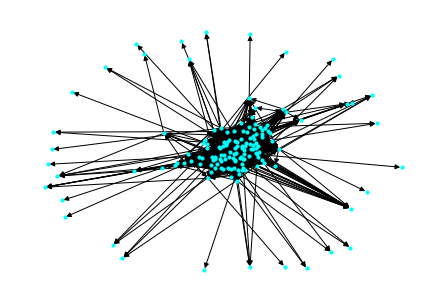

In [166]:
G = nx.DiGraph() #--->DiGrafo para hacer un grado dirigido 


G.add_edges_from(aristas)


nx.draw(G,font_size=0.5,node_size=10,node_color='cyan')